In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('bank/bank-full.csv', sep=';')

In [4]:
df = pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [5]:
df['y'] = df['y'].map({'yes': 1 , 'no':0})

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.114375,0.215257,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.318269,0.411005,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(45211, 52)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = df.pop('y')

In [12]:
X_eval, X_holdout, y_eval, y_holdout = train_test_split(df, y, test_size=.5, random_state=11238)
X_train , X_test, y_train , y_test = train_test_split(X_eval,y_eval, test_size=.33, random_state=11238)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
from keras.callbacks import History

In [18]:
n_neurons = X_train.shape[1]//2
input_dim = (X_train.shape[1], )

In [19]:
model_1 = Sequential()

model_1.add(
    Dense(n_neurons,
         input_shape= input_dim,
         activation= 'relu',
         use_bias=True,
         name='1st_layer')
)

model_1.add(
    Dense(1,
         activation='sigmoid',
         name='output_layer')
)

model_1.compile(
    optimizer = Adadelta(),
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 25)                1300      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 1,326
Trainable params: 1,326
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_1 = History()

model_1.fit(X_train,y_train, epochs=50, batch_size=512, verbose=0, callbacks=[history_1], validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.


In [21]:
model_1.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 8us/step


[0.5553563279271558, 0.8392904538459866]

In [22]:
## 2 capas ocultas

In [25]:
model_2 = Sequential()

model_2.add(
    Dense(n_neurons,
         input_shape= input_dim,
         activation= 'relu',
         use_bias=True,
         name='1st_layer')
)

model_2.add(
    Dense(n_neurons,
         activation= 'relu',
         use_bias=True,
         name='2nd_layer')
)

model_2.add(
    Dense(1,
         activation='sigmoid',
         name='output_layer')
)

model_2.compile(
    optimizer = Adadelta(),
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 25)                1300      
_________________________________________________________________
2nd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 1,976
Trainable params: 1,976
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_2 = History()

model_2.fit(X_train,y_train, epochs=50, 
            batch_size=512, verbose=0,
            callbacks=[history_2], validation_data=(X_test,y_test))

In [27]:
model_2.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 8us/step


[0.4803406542922969, 0.8849862868317796]

In [28]:
#error perdida / % acertividad

In [33]:
model_3 = Sequential()
model_3.add(Dense(n_neurons,
                input_shape = input_dim,
                activation = 'relu',
                use_bias = True,
                name = '1st_layer'))
model_3.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                name = '2nd_layer'))
model_3.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                name = '3rd_layer'))
model_3.add(Dense(1,
                activation='sigmoid',
                name = 'output_layer'))
model_3.compile(optimizer=Adadelta(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 25)                1300      
_________________________________________________________________
2nd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
3rd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 2,626
Trainable params: 2,626
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_3 = History()
model_3.fit(X_train,y_train, epochs=50, 
            batch_size=512, verbose=0,
            callbacks=[history_3], validation_data=(X_test,y_test))

In [35]:
model_3.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 9us/step


[0.3728219551525105, 0.8854728832894971]

In [36]:
model_4 = Sequential()
model_4.add(Dense(n_neurons,
                input_shape = input_dim,
                activation = 'relu',
                use_bias = True,
                name = '1st_layer'))
model_4.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                name = '2nd_layer'))
model_4.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                name = '3rd_layer'))
model_4.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                name = '4th_layer'))
model_4.add(Dense(1,
                activation='sigmoid',
                name = 'output_layer'))
model_4.compile(optimizer=Adadelta(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 25)                1300      
_________________________________________________________________
2nd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
3rd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
4th_layer (Dense)            (None, 25)                650       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 3,276
Trainable params: 3,276
Non-trainable params: 0
_________________________________________________________________


In [66]:
history_4 = History()

model_4.fit(X_train,y_train, epochs=50, 
            batch_size=512, verbose=0,
            callbacks=[history_4], validation_data=(X_test,y_test))

In [67]:
model_4.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 10us/step


[0.25266177834562104, 0.8888348225976455]

In [68]:
preserve_history_values = lambda x: [np.mean(x.history[i]).round(3) for i in x.history.keys()]

values = pd.DataFrame(
    {'1 Capa': preserve_history_values(history_1),
     '2 Capas': preserve_history_values(history_2),
     '3 Capas': preserve_history_values(history_3),
     '4 Capas': preserve_history_values(history_4),
    'metric': list(history_1.history.keys())}
).set_index('metric')

values

,1 Capa,2 Capas,3 Capas,4 Capas
metric,,,,
val_loss,1.008,0.283,0.826,0.259
val_acc,0.854,0.885,0.864,0.888
loss,1.031,0.273,0.850,0.250
acc,0.862,0.885,0.857,0.890


In [73]:
def plot_cross_entropy(history, ax=None):
    layers = len(history.model.layers)
    extract_val_loss = history.history['val_loss']
    extract_loss = history.history['loss']
    plt.plot(range(1, len(extract_val_loss) + 1),
            extract_val_loss,label = 'CV Error',
            color='tomato', lw=2)
    plt.plot(range(1, len(extract_loss) + 1),
            extract_loss, label = 'Training Error',
            color='dodgerblue', lw=2)
    plt.legend()

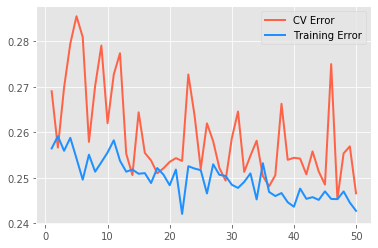

In [77]:
plot_cross_entropy(history_4)

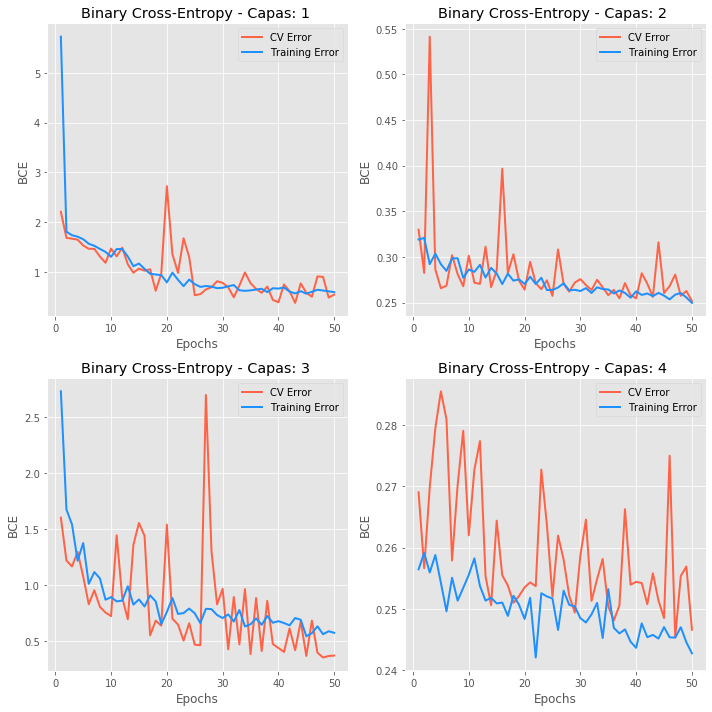

In [79]:
plt.figure(figsize=(10, 10))
for index, value in enumerate([history_1, history_2, history_3, history_4]):
    plt.subplot(2, 2, index + 1)
    plot_cross_entropy(value)
    #if index == 0:
    #    y_lim_min, y_lim_max = plt.ylim()
    #plt.ylim(y_lim_min, y_lim_max)
    plt.title("Binary Cross-Entropy - Capas: {} ".format(index + 1))
    plt.tight_layout()
    plt.xlabel('Epochs')
    plt.ylabel('BCE')

In [80]:
from keras.regularizers import l2

In [81]:
model_4_reg = Sequential()

model_4_reg.add(Dense(n_neurons,
                input_shape = input_dim,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                name = '1st_layer'))

model_4_reg.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                name = '2nd_layer'))

model_4_reg.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                name = '3rd_layer'))

model_4_reg.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                name = '4th_layer'))

model_4_reg.add(Dense(1,
                activation='sigmoid',
                name = 'output_layer'))

model_4_reg.compile(optimizer=Adadelta(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
model_4_reg.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 25)                1300      
_________________________________________________________________
2nd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
3rd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
4th_layer (Dense)            (None, 25)                650       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 26        
Total params: 3,276
Trainable params: 3,276
Non-trainable params: 0
_________________________________________________________________


In [82]:
history_4_reg = History()

model_4_reg.fit(X_train,y_train, epochs=50, 
            batch_size=512, verbose=0,
            callbacks=[history_4_reg], validation_data=(X_test,y_test))
model_4_reg.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 10us/step


[0.44894228551721693, 0.8849862868159596]

(0, 2)

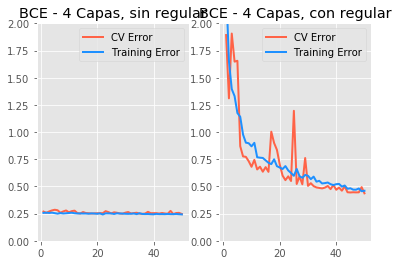

In [86]:
plt.subplot(1,2,1)
plot_cross_entropy(history_4)
plt.ylim(0,2)
plt.title('BCE - 4 Capas, sin regular')
plt.subplot(1,2,2)
plot_cross_entropy(history_4_reg)
plt.title('BCE - 4 Capas, con regular')
plt.ylim(0,2)

In [87]:
from keras.layers import Dropout
from keras.regularizers import l2
from keras.constraints import maxnorm

In [90]:
constraint = maxnorm(3)

In [92]:
model_4_drop = Sequential()

model_4_drop.add(Dense(n_neurons,
                input_shape = input_dim,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                kernel_constraint = constraint,
                name = '1st_layer'))

model_4_drop.add(
    Dropout(.2,name='1stdrop'))

model_4_drop.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                kernel_constraint = constraint,
                name = '2nd_layer'))

model_4_drop.add(
    Dropout(.2,name='2nddrop'))

model_4_drop.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                kernel_constraint = constraint,
                name = '3rd_layer'))

model_4_drop.add(
    Dropout(.2,name='3rddrop'))

model_4_drop.add(Dense(n_neurons,
                activation = 'relu',
                use_bias = True,
                kernel_regularizer=l2(0.01),
                kernel_constraint = constraint,
                name = '4th_layer'))

model_4_drop.add(
    Dropout(.2,name='4thdrop'))

model_4_drop.add(Dense(1,
                activation='sigmoid',
                name = 'output_layer'))

model_4_drop.compile(optimizer=Adadelta(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
model_4_drop.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 25)                1300      
_________________________________________________________________
1stdrop (Dropout)            (None, 25)                0         
_________________________________________________________________
2nd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
2nddrop (Dropout)            (None, 25)                0         
_________________________________________________________________
3rd_layer (Dense)            (None, 25)                650       
_________________________________________________________________
3rddrop (Dropout)            (None, 25)                0         
_________________________________________________________________
4th_layer (Dense)            (None, 25)              

In [89]:
history_4_drop = History()

model_4_drop.fit(X_train,y_train, epochs=50, 
            batch_size=512, verbose=0,
            callbacks=[history_4_drop], validation_data=(X_test,y_test))
model_4_drop.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 11us/step


[0.5047693709446288, 0.8830399009007158]

In [93]:
history_4_drop = History()

model_4_drop.fit(X_train,y_train, epochs=100, 
            batch_size=512, verbose=0,
            callbacks=[history_4_drop], validation_data=(X_test,y_test))
model_4_drop.evaluate(X_holdout,y_holdout)

22606/22606 [==============================] - 0s 12us/step


[0.2952503657236591, 0.8889232947057953]

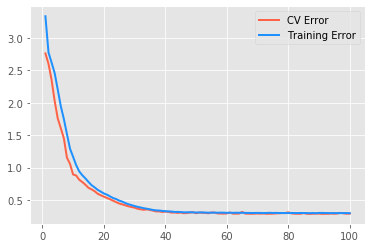

In [94]:
plot_cross_entropy(history_4_drop)

In [96]:
from sklearn.preprocessing import StandardScaler

X_mat = StandardScaler().fit_transform(df)
X_evaluate_std, X_holdout_std, y_evaluate_std, y_holdout_std = train_test_split(X_mat, y, test_size=0.5, random_state=11238)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_evaluate_std, y_evaluate_std, test_size=0.5,
random_state=11238)
model_std = Sequential(name = 'two_layer_model_std')
model_std.add(Dense(20,
                input_shape = (X_mat.shape[1], ),
                activation='relu',
                use_bias=True,
                name = 'first_hidden_layer'))
model_std.add(Dense(20,
                activation='relu',
                use_bias=True,
                name = 'second_hidden_layer'))
model_std.add(Dense(1,
                activation='sigmoid',
                name='output_layer'))
model_std.compile(optimizer=Adadelta(),
             loss = 'binary_crossentropy',
metrics = ['accuracy'])

In [97]:
history_2_std = History()
model_std.fit(X_train_std, y_train_std,
              epochs=50, batch_size=512,
              verbose=0, callbacks=[history_2_std],
         validation_data = (X_test_std, y_test_std))
store_results_4_std = model.evaluate(X_holdout_std, y_holdout_std)

22606/22606 [==============================] - 0s 18us/step


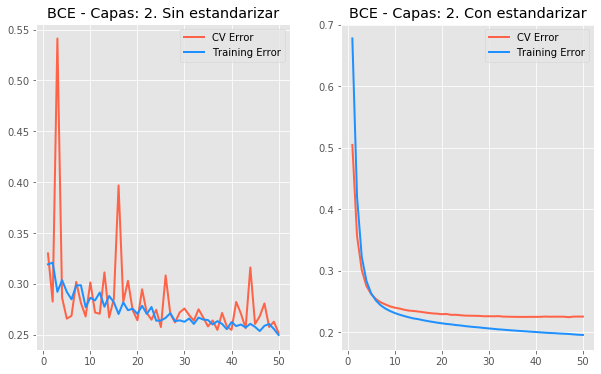

In [98]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("BCE - Capas: 2. Sin estandarizar")
plot_cross_entropy(history_2)
plt.subplot(1, 2, 2)
plt.title("BCE - Capas: 2. Con estandarizar")
plot_cross_entropy(history_2_std)